<a href="https://colab.research.google.com/github/Suhas-S63/Advanced_ML_Lab/blob/main/2348563_AML_Lab_Program_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Program_1_Dataset - Program_1_Dataset.csv')
data.head()


,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [8]:
data.isnull().sum()


Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

No missing values or incomplete data

In [6]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Consider the column, ‘Avg_room’, as predictor, and ‘MValue’ as the target variable

X = data['Avg_rooms']
Y = data['MValue']


In the above cell we as using the 'Avg_room' as the predictor attribute assigned to 'X' variable and the 'MValue' as the target variable assigned to 'Y' variable and in the next step we checking the association between the two attributes

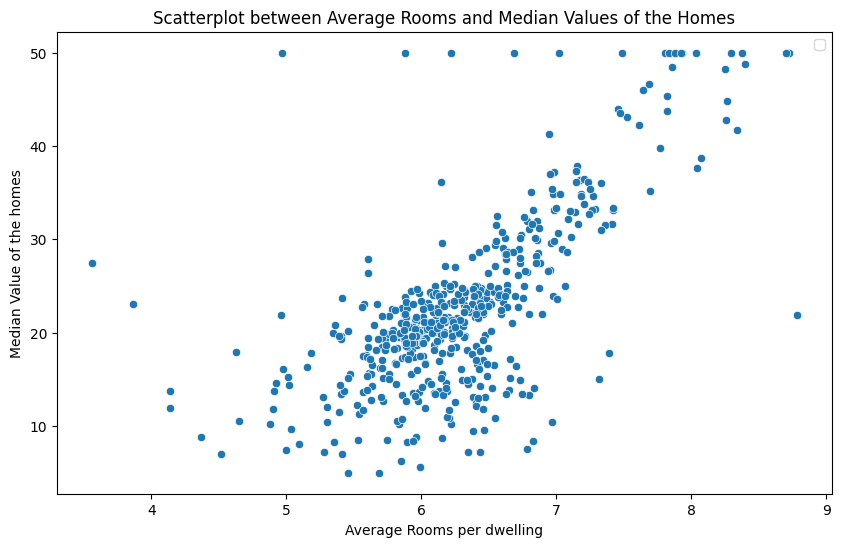

In [10]:
# Scatter plot to visualise the variables
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Avg_rooms', y = 'MValue', data=data)
plt.title('Scatterplot between Average Rooms and Median Values of the Homes')
plt.xlabel('Average Rooms per dwelling')
plt.ylabel('Median Value of the homes')
plt.legend()
plt.show()

Inferences drawn from the Scatterplot graph between the attributes:

*   There is a positive correlation between the Average Rooms and Median Values since as the rooms increases the median values also increases.
*   We can also see some variation or outliers in the data where for the same number of rooms the price of the homes varies immensly which could influenced by other attributes in the dataset.
*   The graph shows that the association between the predictor and target variables is strong



In [11]:
# Splitting the data into training and testing data for model training
# and evaluation
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


Linear Regression:

Linear Regression is one of the supervised regression model which is used to compute the linear relationship between one dependent(target) variable and one or many independent variables/features.

The goal is to find the best linear equation which can predict the dependent variable from the given set of independent variables

The equation is given as:

Y = b0 + b1*x

where b0 is the intercept and b1 is the coefficient of x and these values are used to get the best fit line for the regression

In [15]:
# Training the model in the Testing data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1),Y_train)

LinearRegression()

In [16]:
# Printing the coefficient and intercept values for the model

coefficient = model.coef_[0]
intercepts = model.intercept_

print(f'Coefficient: {coefficient}, Intercept: {intercepts}')

Coefficient: 8.926202222337784, Intercept: -33.510147597513345


We see that the coefficient value is 8.93 which would mean that the for each additional room the median value would increase by a factor of 8.93

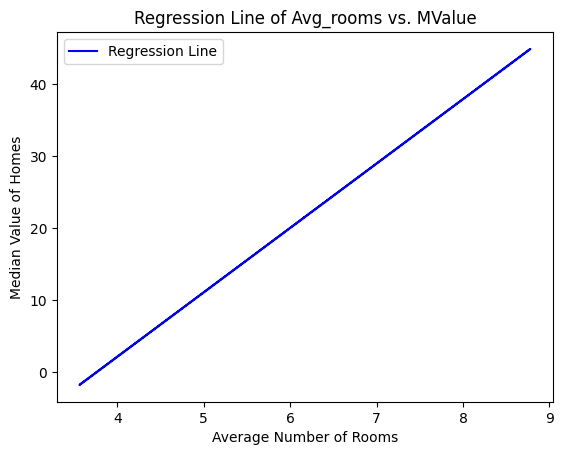

In [19]:
# Plot the regression line
plt.plot(X_train, model.predict(X_train.values.reshape(-1, 1)), color='blue', label='Regression Line')

plt.title('Regression Line of Avg_rooms vs. MValue')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes')
plt.legend()
plt.show()

This is the best fit Regression line visualised by prediction done by the Linear Regression Model

Model Evaluation using Performance Metrics

Mean Squared Error Value:

It is the cost function which is the difference between the actual value of Y with the predicted value of Y.

It is given by the formula:

Mean Sqaured Error(MSE) = ∑(observed_value - predicted_value)/n

where n is the number of observations

This equation is mainly used to estimate how close the prediction is to the actual values.

R-sqaured value:

R-squared (R2) is a measure that provides information about the goodness of fit of a model. In  regression, it is a statistical measure of how well the regression line approximates the actual data.
Therefore in other words it explains the variance of one variable with another variable.

It is also known as Coefficient of Determination

It is given by the formula:

R
2
=
1
−
(sum squared regression (SSR)/
total sum of squares (SST))

The sum squared regression is the sum of the residuals squared, and the total sum of squares is the sum of the distance the data is away from the mean all squared. As it is a percentage it will take values between
0
 and
1
.

In [21]:
# Evaluate the model using mean squared error and R-squared values
# Training set
from sklearn.metrics import mean_squared_error, r2_score

Y_training_predictions = model.predict(X_train.values.reshape(-1, 1))
mse_training = mean_squared_error(Y_train, Y_training_predictions)
r2_training = r2_score(Y_train, Y_training_predictions)

In [23]:
# Testing set

Y_testing_predictions = model.predict(X_test.values.reshape(-1, 1))
mse_testing = mean_squared_error(Y_test, Y_testing_predictions)
r2_testing = r2_score(Y_test, Y_testing_predictions)

In [25]:
print(f'Training Set - Mean Squared Error: {mse_training}, R-squared: {r2_training}')
print(f'Testing Set - Mean Squared Error: {mse_testing}, R-squared: {r2_testing}')

Training Set - Mean Squared Error: 47.81170547959663, R-squared: 0.46176397399316227
Testing Set - Mean Squared Error: 33.853804802145724, R-squared: 0.5424461839891813


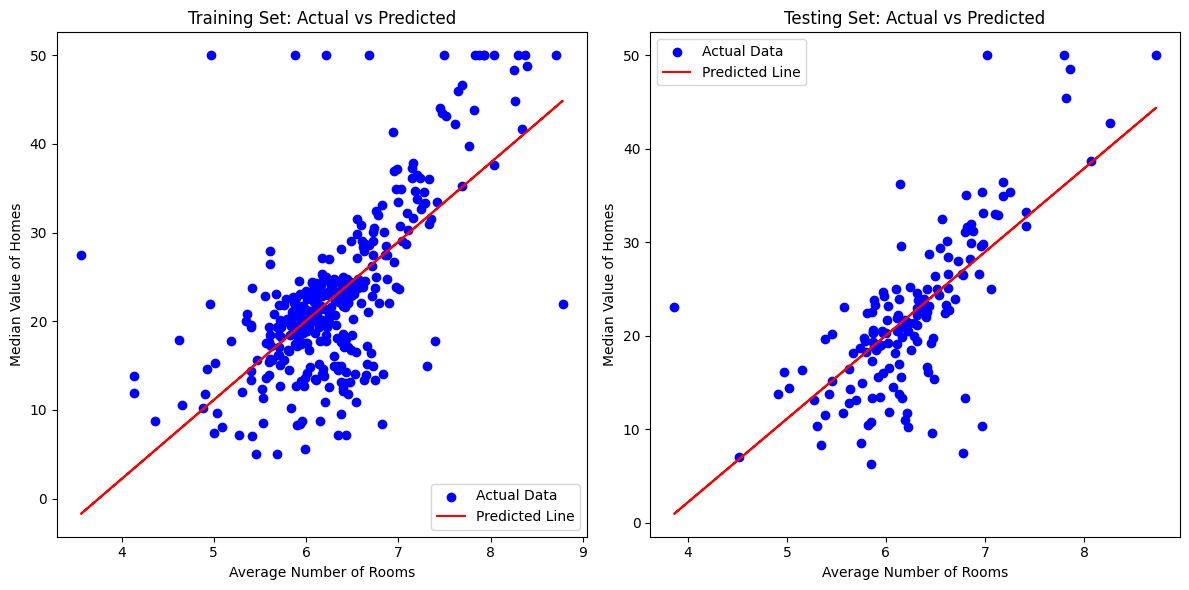

In [26]:
# Plotting the training set
plt.figure(figsize=(12, 6))

# Training set - Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, color='blue', label='Actual Data')
plt.plot(X_train, model.predict(X_train.values.reshape(-1, 1)), color='red', label='Predicted Line')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes')
plt.legend()

# Testing set - Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, model.predict(X_test.values.reshape(-1, 1)), color='red', label='Predicted Line')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes')
plt.legend()

plt.tight_layout()
plt.show()

Some inferences from the Model evaluation:

*   The model's performance on the training data is acceptable as indicated by R2 value of 46% which would say that there is a 46% variance in the target variable of the training data.

*   The model is also able to predict well on the testing data. The lower MSE value suggests that the model does not have overfitting issue with training data.

*   The model implies that there is a positive correlation between the average number of rooms in a house and its median value. This aligns with common expectations since larger houses tend to have higher values.

We can say that the model provides a reasonably good explanation and understanding of the relationship between the average number of rooms and the median values of homes in the dataset and we also see a good amount of variance within the dataset also.